In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import probplot
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
Salary_Data=pd.read_csv('Salary_Data.csv')

In [3]:
Salary_Data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
Salary_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [5]:
Salary_Data.isnull().values.any()

False

In [6]:
Salary_Data.shape

(30, 2)

In [7]:
Salary_Data.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [8]:
Salary_Data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

#Graphical Analysis

C:\Users\DELL\AppData\Local\Temp\ipykernel_11324\4287998831.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Salary_Data['YearsExperience'],kde=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_11324\4287998831.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Salary_Data['Salary'])


Text(0.5, 1.0, "Q-Q plot of 'Salary'")

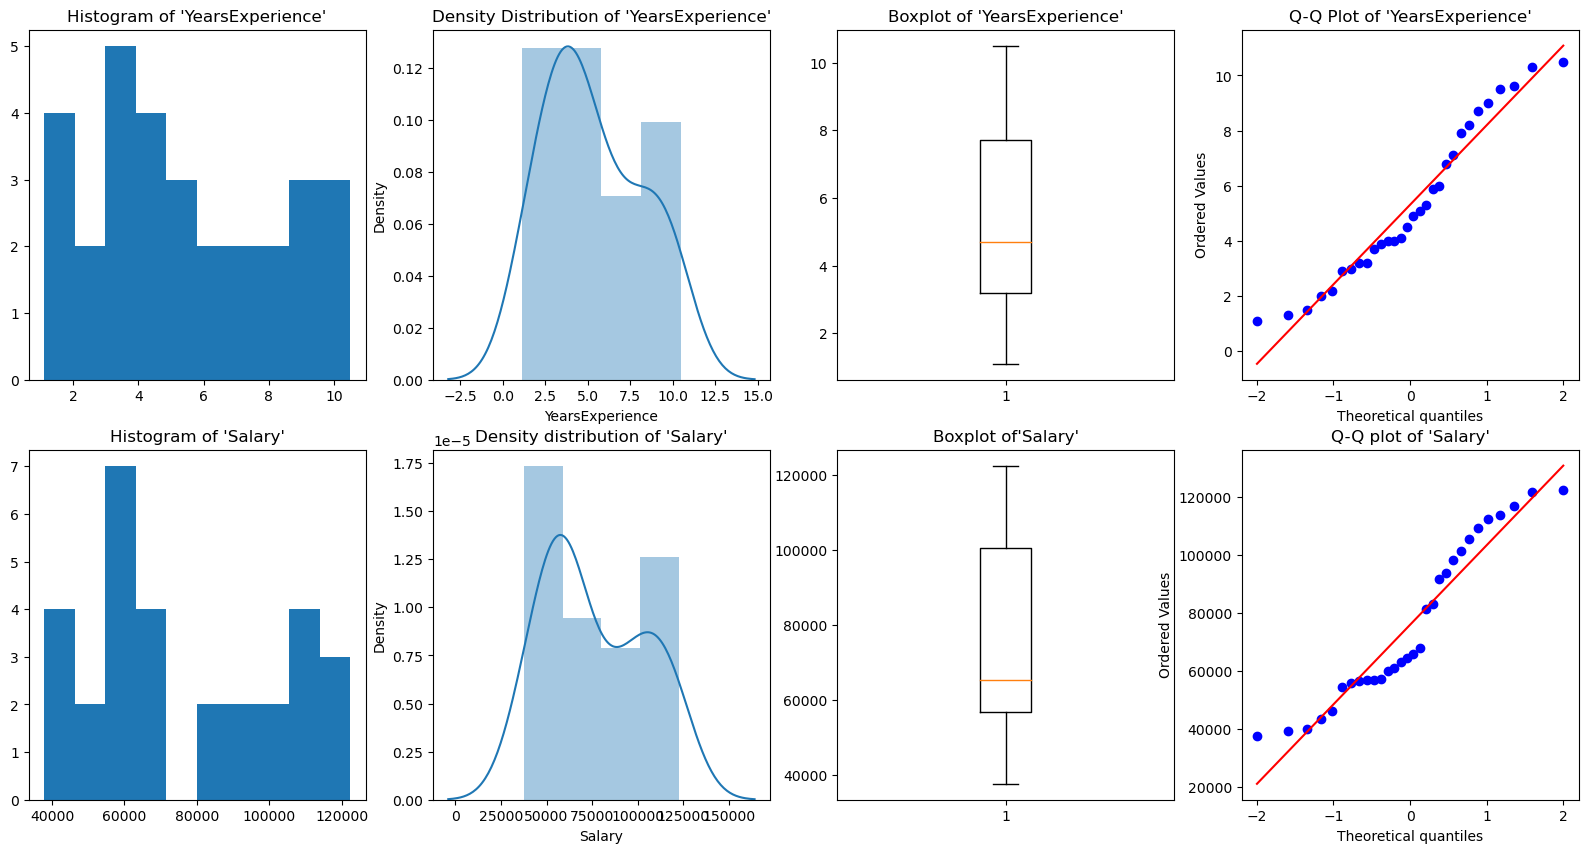

In [9]:
# Histogram
plt.figure(figsize=(20,10))
plt.subplot(2,4,1)
plt.hist(Salary_Data['YearsExperience'],density=False)
plt.title("Histogram of 'YearsExperience'" )
plt.subplot(2,4,5)
plt.hist(Salary_Data['Salary'],density=False)
plt.title("Histogram of 'Salary'")

# Desity plot
plt.subplot(2,4,2)
sns.distplot(Salary_Data['YearsExperience'],kde=True)
plt.title("Density Distribution of 'YearsExperience'")
plt.subplot(2,4,6)
sns.distplot(Salary_Data['Salary'])
plt.title("Density distribution of 'Salary'")

# Boxplot
plt.subplot(2,4,3)
plt.boxplot(Salary_Data['YearsExperience'])
plt.title("Boxplot of 'YearsExperience'")
plt.subplot(2,4,7)
plt.boxplot(Salary_Data['Salary'])
plt.title("Boxplot of'Salary'")

# Normal Q-Q plot
plt.subplot(2,4,4)
probplot(Salary_Data['YearsExperience'],plot=plt)
plt.title("Q-Q Plot of 'YearsExperience'")
plt.subplot(2,4,8)
probplot(Salary_Data['Salary'],plot=plt)
plt.title("Q-Q plot of 'Salary'")





# Model Building

In [10]:
model=smf.ols("Salary~YearsExperience", data=Salary_Data).fit()

In [11]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 23 Apr 2024   Prob (F-statistic):           1.14e-20
Time:                        19:42:12   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
# Square Root Transformation of data
model_sqrt=smf.ols('np.sqrt(Salary)~np.sqrt(YearsExperience)',data=Salary_Data).fit()
model_sqrt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.sqrt(Salary)   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     454.3
Date:                Tue, 23 Apr 2024   Prob (F-statistic):           7.58e-19
Time:                        19:42:13   Log-Likelihood:                -116.52
No. Observations:                  30   AIC:                             237.0
Df Residuals:                      28   BIC:                             239.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  103.5680      8.178     12.663      0.000      86.815     120.321
np.sqrt(YearsExperience)    75.6269      3.548     21.315      0.000      68.359      82.895
==============================================================================
Omnibus:                        0.924   Durbin-Watson:                   1.362
Prob(Omnibus):                  0.630   Jarque-Bera (JB):                0.801
Skew:                           0.087   Prob(JB):                        0.670
Kurtosis:                       2.219   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
# Cube Root transformation of data
model_cbrt=smf.ols('np.cbrt(Salary)~np.cbrt(YearsExperience)',data=Salary_Data).fit()
model_cbrt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.cbrt(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     386.5
Date:                Tue, 23 Apr 2024   Prob (F-statistic):           6.37e-18
Time:                        19:42:14   Log-Likelihood:                -50.589
No. Observations:                  30   AIC:                             105.2
Df Residuals:                      28   BIC:                             108.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   16.6603      1.300     12.811      0.000      13.996      19.324
np.cbrt(YearsExperience)    14.8963      0.758     19.659      0.000      13.344      16.448
==============================================================================
Omnibus:                        0.386   Durbin-Watson:                   1.229
Prob(Omnibus):                  0.824   Jarque-Bera (JB):                0.535
Skew:                           0.070   Prob(JB):                        0.765
Kurtosis:                       2.361   Cond. No.                         12.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
model_log=smf.ols('np.log(Salary)~np.log(YearsExperience)',data=Salary_Data).fit()
model_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     267.4
Date:                Tue, 23 Apr 2024   Prob (F-statistic):           7.40e-16
Time:                        19:42:15   Log-Likelihood:                 23.209
No. Observations:                  30   AIC:                            -42.42
Df Residuals:                      28   BIC:                            -39.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  10.3280      0.056    184.868      0.000      10.214      10.442
np.log(YearsExperience)     0.5621      0.034     16.353      0.000       0.492       0.632
==============================================================================
Omnibus:                        0.102   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.950   Jarque-Bera (JB):                0.297
Skew:                           0.093   Prob(JB):                        0.862
Kurtosis:                       2.549   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#Model Testing

In [15]:
print(model.params,'\n''\n',model.tvalues,'\n''\n',model.pvalues)

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64 

 Intercept          11.346940
YearsExperience    24.950094
dtype: float64 

 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [16]:
# R squared Value
model.rsquared,model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

# Predicting Values

In [17]:
# Result without transformation of data
predicted = pd.DataFrame()
predicted['YearsExperience'] = Salary_Data.YearsExperience
predicted['Salary'] = Salary_Data.Salary
predicted['Predicted_Salary_Hike'] = pd.DataFrame(model.predict(predicted.YearsExperience))
predicted

,YearsExperience,Salary,Predicted_Salary_Hike
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306
5,2.9,56642.0,53197.090931
6,3.0,60150.0,54142.087163
7,3.2,54445.0,56032.079627
8,3.2,64445.0,56032.079627
9,3.7,57189.0,60757.060788
